In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dat <- read.csv("../dagdata/inst/extdata/femaleMiceWeights.csv")

In [3]:
head(dat)

,Diet,Bodyweight
,<chr>,<dbl>
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [6]:
control <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist
control

Bodyweight1  Bodyweight2  Bodyweight3  Bodyweight4  Bodyweight5  Bodyweight6 
       21.51        28.14        24.04        23.45        23.68        19.79 
 Bodyweight7  Bodyweight8  Bodyweight9 Bodyweight10 Bodyweight11 Bodyweight12 
       28.40        20.98        22.51        20.10        26.91        26.25

In [8]:
treatment <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist
treatment

Bodyweight1  Bodyweight2  Bodyweight3  Bodyweight4  Bodyweight5  Bodyweight6 
       25.71        26.37        22.80        25.34        24.97        28.14 
 Bodyweight7  Bodyweight8  Bodyweight9 Bodyweight10 Bodyweight11 Bodyweight12 
       29.58        30.92        34.02        21.90        31.53        20.73

In [9]:
mean(treatment)

[1] 26.83417

In [11]:
mean(control)

[1] 23.81333

In [12]:
mean(treatment) -mean(control)

[1] 3.020833

In [14]:
population <- read.csv("../dagdata/inst/extdata/femaleControlsPopulation.csv")
head(population)

,Bodyweight
,<dbl>
1,27.03
2,24.80
3,27.02
4,28.07
5,23.55
6,22.72


In [15]:
population <- unlist(population)

In [20]:
length(population)

[1] 225

In [16]:
sample(population, 12)

Bodyweight142 Bodyweight129 Bodyweight221   Bodyweight9  Bodyweight91 
        25.97         27.15         26.91         23.98         22.66 
 Bodyweight18 Bodyweight177  Bodyweight89 Bodyweight119 Bodyweight195 
        27.92         23.80         24.23         23.19         23.30 
Bodyweight114 Bodyweight105 
        26.15         23.70

In [30]:
mean(sample(population, 12))

[1] 25.66333

# NULL Distributions & P-Values

In [32]:
obs <- mean(treatment) - mean(control)

In [33]:
population <- read.csv("../dagdata/inst/extdata/femaleControlsPopulation.csv")

In [34]:
population <- unlist(population)

In [70]:
n <- 10000

nulls <- vector("numeric", n)
for(i in 1:n) {
    control <- sample(population, 12)
    treatment <- sample(population, 12)

    nulls[i] <- mean(treatment) - mean(control)
}

In [71]:
max(nulls)

[1] 6.341667

In [72]:
min(nulls)

[1] -4.905

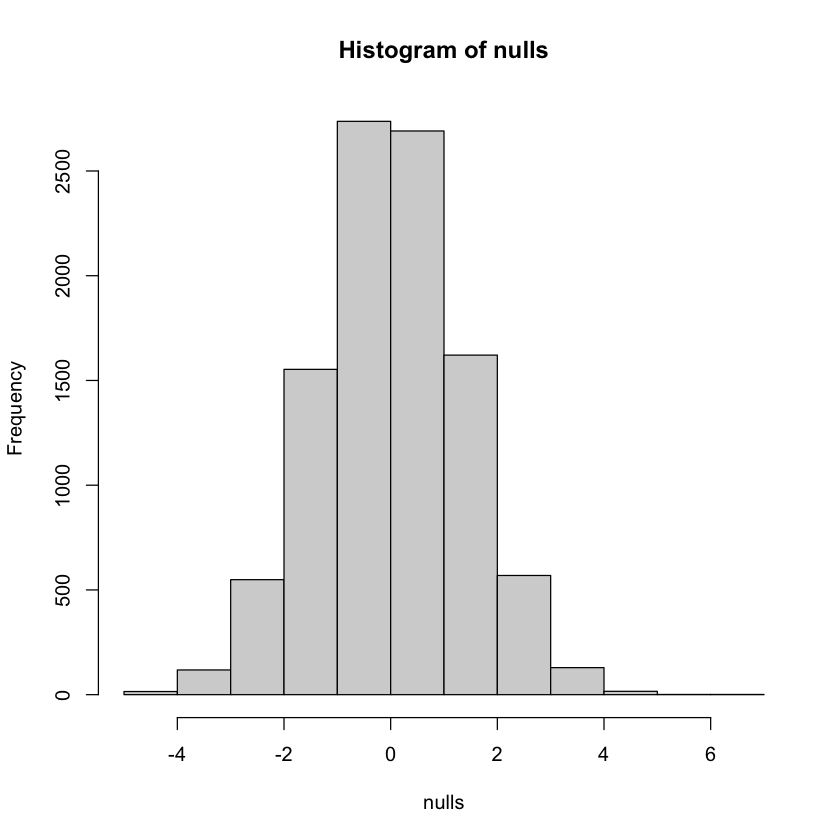

In [73]:
hist(nulls)

In [77]:
#sum(nulls > obs) / n

# or

mean(nulls > obs)

[1] 0.014

In [78]:
mean(abs(nulls) > obs) # P value

[1] 0.0271